### RGB轉HSV畫直方圖

https://www.itread01.com/article/1532049265.html

https://docs.opencv.org/trunk/dd/d0d/tutorial_py_2d_histogram.html

https://www.cnblogs.com/happyamyhope/p/8127413.html

### OpenCV中的二維直方圖

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
#flags=[i for i in dir(cv2) if i.startswith('COLOR_')]
#print(len(flags))
#print(flags)
#如何檢視flag表示的格式轉換型別

img_path="/dataDisk/myfloder/jupyter/測試用/10278810978167.jpg"
img = cv2.imread(img_path)
hsv=cv2.cvtColor(img,cv2.COLOR_BGR2HSV)


hist=cv2.calcHist([hsv],[0,1],None,[180,256],[0,180,0,256])


plt.imshow(hist,interpolation='nearest')
plt.show()
#b,g,r=cv2.split(img) 
#print(type(img))
#img.shape

### Numpy中的二維直方圖

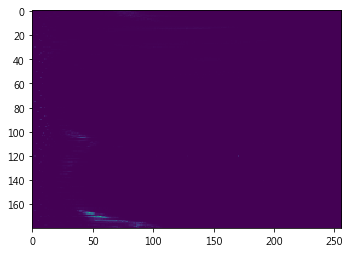

In [4]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img_path="/dataDisk/myfloder/jupyter/測試用/10278811288180.jpg"
img = cv2.imread(img_path)
hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)   
h,s,v =cv2.split(hsv)

#第一個引數是H平面，第二個是S平面，第三個是每個bins的數量，第四個是它們的範圍。
hist, xbins, ybins = np.histogram2d(h.ravel(),s.ravel(),[180,256],[[0,180],[0,256]])

plt.imshow(hist, interpolation='nearest')
plt.show()

### bitwise_and 

https://www.itread01.com/content/1544893570.html

https://www.itread01.com/p/463450.html

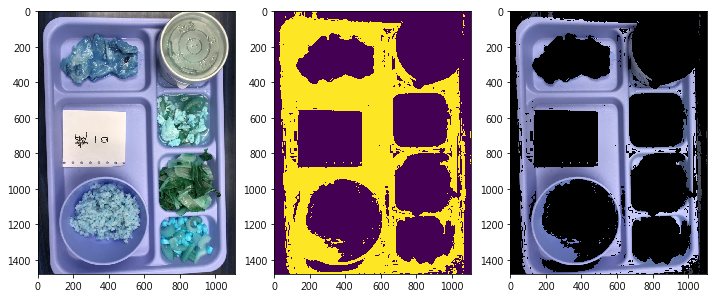

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img_path="/dataDisk/myfloder/jupyter/測試用/10278811179805.jpg"
img = cv2.imread(img_path)
hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)  
LowerBlue = np.array([0, 45, 70])
UpperBlue = np.array([9, 120, 255])
mask = cv2.inRange(hsv, LowerBlue, UpperBlue)

things = cv2.bitwise_and(img, img, mask=mask)

plt.figure(figsize=(12,8))
plt.subplot(1,3,1)
plt.imshow(img)
plt.subplot(1,3,2)
plt.imshow(mask)
plt.subplot(1,3,3)
plt.imshow(things)
plt.show()
# cv2.namedWindow('img', cv2.WINDOW_NORMAL)
# cv2.imshow('img',img)
# cv2.namedWindow('mask', cv2.WINDOW_NORMAL)
# cv2.imshow('mask',mask)
# cv2.namedWindow('BlueThings', cv2.WINDOW_NORMAL)
# cv2.imshow('BlueThings',things)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

### HSV顏色範圍抓取

https://blog.csdn.net/u010429424/article/details/76577399

In [ ]:
import cv2
import numpy as np

"""
功能：读取一张图片，显示出来，转化为HSV色彩空间
     并通过滑块调节HSV阈值，实时显示
"""
img_path="/dataDisk/myfloder/jupyter/測試用/10278811288180.jpg"
image = cv2.imread(img_path) # 根据路径读取一张图片
cv2.namedWindow('BGR', cv2.WINDOW_NORMAL)
cv2.imshow("BGR", image) # 显示图片

hsv_low = np.array([0, 0, 0])
hsv_high = np.array([0, 0, 0])

# 下面几个函数，写得有点冗余

def h_low(value):
    hsv_low[0] = value

def h_high(value):
    hsv_high[0] = value

def s_low(value):
    hsv_low[1] = value

def s_high(value):
    hsv_high[1] = value

def v_low(value):
    hsv_low[2] = value

def v_high(value):
    hsv_high[2] = value

cv2.namedWindow('image',cv2.WINDOW_NORMAL)
cv2.createTrackbar('H low', 'image', 0, 255, h_low) 
cv2.createTrackbar('H high', 'image', 0, 255, h_high)
cv2.createTrackbar('S low', 'image', 0, 255, s_low)
cv2.createTrackbar('S high', 'image', 0, 255, s_high)
cv2.createTrackbar('V low', 'image', 0, 255, v_low)
cv2.createTrackbar('V high', 'image', 0, 255, v_high)

cv2.namedWindow('dst',cv2.WINDOW_NORMAL)
while True:
    dst = cv2.cvtColor(image, cv2.COLOR_BGR2HSV) # BGR转HSV
    dst = cv2.inRange(dst, hsv_low, hsv_high) # 通过HSV的高低阈值，提取图像部分区域
    cv2.imshow('dst', dst)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cv2.destroyAllWindows()

### RGB分量直方圖

In [ ]:
import cv2    
import numpy as np  

def calcAndDrawHist(image, color):  
    hist= cv2.calcHist([image], [0], None, [256], [0.0,255.0])  
    minVal, maxVal, minLoc, maxLoc = cv2.minMaxLoc(hist)  
    histImg = np.zeros([256,256,3], np.uint8)  
    hpt = int(0.9* 256);  
      
    for h in range(256):  
        intensity = int(hist[h]*hpt/maxVal)  
        cv2.line(histImg,(h,256), (h,256-intensity), color)  
          
    return histImg; 

In [ ]:
if __name__ == '__main__':  
    img=cv2.imread('../Plat6_dinner_20181005_20232_NS.jpg')  
    b,g,r=cv2.split(img)  
  
    histImgB = calcAndDrawHist(b, [255, 0, 0])  
    histImgG = calcAndDrawHist(g, [0, 255, 0])  
    histImgR = calcAndDrawHist(r, [0, 0, 255])  
      
    cv2.imshow("histImgB", histImgB)  
    cv2.imshow("histImgG", histImgG)  
    cv2.imshow("histImgR", histImgR)  
    cv2.imshow("Img", img)  
    cv2.waitKey(0)  
    cv2.destroyAllWindows() 

### no apply

### end

https://blog.csdn.net/wsp_1138886114/article/details/80660014